In [79]:
import pandas as pd
import numpy as np
#from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
#from sklearn.impute import SimpleImputer
#import tensorflow as tf
import cv2
import os, sys
import glob
import pickle
from keras.models import Sequential
from keras.layers import Conv2D
 
from io import BytesIO
import urllib.request
from PIL import Image
import requests

#import bs4
#from bs4 import BeautifulSoup
#import time,re,os



In [80]:
#Online image to array

def image_to_array(url:str)->str:
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    np_bytes = BytesIO()
    np.save(np_bytes, img, allow_pickle=True)

    np_bytes = np_bytes.getvalue()

    load_bytes = BytesIO(np_bytes)
    loaded_np = np.load(load_bytes, allow_pickle=True)
    return loaded_np


In [81]:
image_to_array('https://img.medsci.cn/webeditor/uploadfile/201708/20170801202421156.jpg')

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [135,  81, 115],
        [135,  77, 115],
        [133,  75, 113]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [106,  57,  87],
        [110,  59,  92],
        [115,  61,  95]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [133,  93, 119],
        [146, 103, 131],
        [154, 111, 139]],

       ...,

       [[234, 231, 240],
        [235, 232, 241],
        [234, 233, 241],
        ...,
        [216, 217, 209],
        [216, 217, 209],
        [217, 218, 210]],

       [[231, 225, 235],
        [230, 227, 236],
        [231, 230, 238],
        ...,
        [216, 217, 209],
        [216, 217, 209],
        [217, 218, 210]],

       [[226, 220, 230],
        [225, 222, 231],
        [228, 225, 234],
        ...,
        [216, 217, 209],
        [216, 217, 209],
        [216, 217, 209]]

In [82]:
path='https://img.medsci.cn/webeditor/uploadfile/201708/20170801202421156.jpg'

def preprocessing(image):
    
    SIZE = 224
    train_images = []

    for directory_path in glob.glob(path +"/Normal"):
        for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            train_images.append(img)
            
    train_images = np.array(train_images)
    

In [83]:
preprocessing(loaded_np)

In [93]:
#####################################################################################################################-

In [34]:
#image = 'Blood_cells_images'
#if not os.path.exists(image):
    #os.mkdir(image)
#headers = {
    #'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0'
    #}
#response = requests.get('https://www.medsci.cn/article/show_article.do?id=90a510e448e0',headers=headers)
#response.encoding = 'GBK'
#response.encoding = 'utf-8'
#print(response.request.headers)
#print(response.status_code)
#t = '<img src="(.*?)" alt="(.*?)" width="160" height="120">'
#result = re.findall(t, response.text)
#for img in result:
    #print(img)
    #res = requests.get(img[0])
    #print(res.status_code)
    #s = img[0].split('.')[-1]  #截取图片后缀，得到表情包格式，如jpg ，gif
    #with open(image + '/' + img[1] + '.' + s, mode='wb') as file:
        #file.write(res.content)


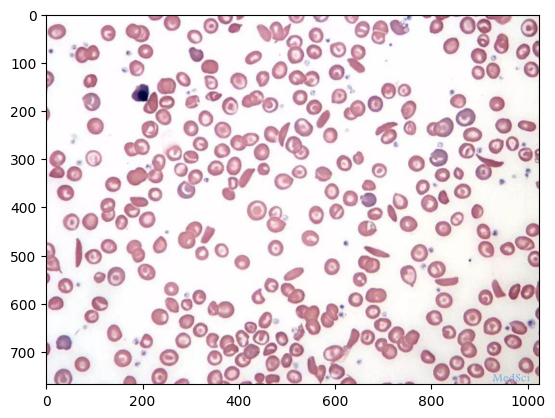

In [26]:
# img_path 是img的完整路径，如 https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fimg1.utuku.china.com%2F640x0%2Fent%2F20200522%2F6ca7ef26-3c5b-4994-9e12-a7a9acc33092.jpg&refer=http%3A%2F%2Fimg1.utuku.china.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1629975252&t=6680d85299eb1313befecd6e86f5e241
#Read network images and save them to memory
 
#global dir

#dir = '/home/jiaziwang/code/vivekptl9/Anaemia_Classification/online_images/'

#原网站:https://www.medsci.cn/article/show_article.do?id=90a510e448e0

#path='https://img.medsci.cn/webeditor/uploadfile/201708/20170801202421156.jpg'

#file = io.BytesIO(urllib.request.urlopen('https://img.medsci.cn/webeditor/uploadfile/201708/20170801202421156.jpg').read())
 
#img = Image.open(file)

#plt.imshow(img)

#img=Image.

#urllib.request.urlretrieve(url,'/home/jiaziwang/code/vivekptl9/Anaemia_Classification/online_images')

In [30]:
def resizing(new_image):
    img = plt.imread(new_image)
    #img=img/255.
    img = cv2.resize(img, dsize=(224,224))
    #f,e=os.path.splittext(path+item)
    cv2.imwrite("resized.jpg", img)


In [ ]:
#path = "/home/lepton/code/vivekptl9/Anaemia_Classification/DD"
print(os.listdir(path))

SIZE = 512 #Resize images

train_images = []

for directory_path in glob.glob(path +"/Normal"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
        
train_images = np.array(train_images)


In [91]:
#path_in='/home/jiaziwang/code/vivekptl9/Anaemia_Classification/raw_data/'
#path_out=
#dirs = os.listdir( path_in )
#def update_image():
    #for item in dirs:
        #if item[-10] == 'identifier':
            #pass
        #else:
#         run your code here
            #if os.path.isfile(path_in+item):
                #img = plt.imread(path_in+item)
                #img=img/255.
                #img = cv2.resize(img, dsize=(224,224))
                #f,e=os.path.splittext(path+item)
                #cv2.imsave(os.path.join(path_out, "rescale.tiff"),img)
                #cv2.waitkey(0)
                
                

In [92]:
#update_image()

In [87]:
#def resizing(new_image):
    #img = plt.imread(new_image)
    #img=img/255.
    #img = cv2.resize(img, dsize=(224,224))
    #f,e=os.path.splittext(path+item)
    #cv2.imwrite("resized.jpg", img)


        

In [88]:
#update_image()

In [89]:
#images1='/home/jiaziwang/code/vivekptl9/Anaemia_Classification/raw_data/pos005_EDOF_DENISOVAN_RGB.tiff'
#images1


In [90]:
#img = plt.imread(images1)
#img=img/255.
#print(img.shape)
#img = cv2.resize(img, dsize=(224,224))
#plt.imshow(img)
#print(img.shape)

In [84]:
# Step 2:Create a Function

In [85]:
#def resize_image(image, output_size = (224, 224)):
    #img = plt.imread(image)
    #img = img/255.
    #return cv2.resize(img, dsize=output_size)    

In [86]:
#resize_image(images1)